DSC160 Data Science and the Arts - Twomey - Spring 2020 - [dsc160.roberttwomey.com](http://dsc160.roberttwomey.com)

## Generate Large Bitmap Figures

This notebook shows how to take a series of thumbnail images and x-y coordinates to make a large, high resolution bitmap image displaying artworks (paintings for instance) in some "style space."

This will be used to make high res bitmap figures like this https://www.flickr.com/photos/culturevis/5921447898/ from http://lab.softwarestudies.com/2011/06/mondrian-vs-rothko-footprints-and.html.

You can adapt this script to your own images and figures you wish to generate.

In [5]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
from skimage import io
from scipy import ndimage
from skimage.color import rgb2hsv
import skimage
from PIL import Image
import random

### Load and display images with skimage

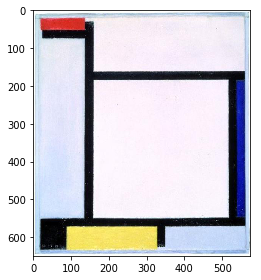

In [12]:
abstract = io.imread('https://images.rkd.nl/rkd/thumb/650x650/56c1a7ff-4661-12ea-e5bc-0f8be29c977a.jpg')
io.imshow(abstract)
io.imsave("abstract.jpg", abstract)

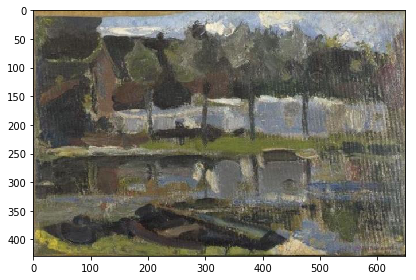

In [8]:
# landscape = io.imread('https://images.rkd.nl/rkd/thumb/650x650/f4ecda17-2066-67e9-aa3f-b6d58df1607c.jpg')
landscape = io.imread('https://images.rkd.nl/rkd/thumb/650x650/bcb9558d-08a1-a57f-b5fc-ec562c446838.jpg')
io.imshow(landscape)
io.imsave("landscape.jpg", landscape)

### Create a thumbnail

In [9]:
# make thumbnail
landscape = Image.open("landscape.jpg") #25x25
size = 128, 128
landscape.thumbnail(size)
landscape.save("land_thumb.jpg")

In [13]:
abstract = Image.open("abstract.jpg") #25x25
size = 128, 128
abstract.thumbnail(size)
abstract.save("abs_thumb.jpg")

### Create a folder full of thumbnails

https://pillow.readthedocs.io/en/3.1.x/reference/Image.html#create-thumbnails

In [14]:
landscape = Image.open("landscape.jpg") #25x25
size = 256, 256
landscape.thumbnail(size)
landscape.save("land_thumb.jpg")

### Create large plot on empty canvas

In [15]:
# create background image
GLOBAL_WIDTH = 7500
bg_color = (192, 192, 192) # gray, you can choose your own
figure = Image.new('RGB', (GLOBAL_WIDTH, GLOBAL_WIDTH), bg_color)

In [21]:
# generate random coords (substitute your calculated coordinates for given plot)
num_points = 100
coords = [(int(random.random()*GLOBAL_WIDTH), int(random.random()*GLOBAL_WIDTH)) for _ in range(num_points)]
print(coords)

[(1703, 5362), (3937, 2449), (418, 1888), (875, 3601), (771, 2045), (5909, 2222), (1334, 733), (1820, 4821), (2442, 1797), (7415, 6837), (5243, 1052), (2925, 7086), (2769, 2272), (818, 1515), (816, 6836), (7342, 6216), (5168, 1573), (4821, 6095), (4477, 2393), (6108, 75), (4746, 768), (1517, 2278), (56, 4799), (2687, 6245), (5492, 2346), (5983, 2371), (1535, 403), (4784, 1427), (2596, 1926), (1540, 3460), (3094, 5055), (51, 7467), (5150, 213), (4658, 4650), (4207, 6329), (7026, 942), (4583, 0), (4475, 3382), (3507, 1386), (7393, 322), (1033, 7481), (5005, 6582), (234, 2832), (6244, 3221), (5839, 861), (541, 4653), (4744, 1678), (743, 3773), (2363, 3043), (3027, 5815), (1305, 2698), (6534, 4467), (166, 3076), (4243, 1615), (1713, 3797), (6453, 2771), (6394, 4307), (5740, 1621), (3702, 4668), (1390, 3937), (918, 4361), (7233, 278), (734, 6460), (2342, 4310), (6598, 2012), (4933, 4488), (3057, 4255), (2649, 337), (6466, 153), (716, 2609), (860, 1306), (6757, 3913), (7249, 3152), (4957, 64

In [17]:
# make a list of corresponding thumbnails (random for now, substitute with yours)
filenames = ["abs_thumb.jpg", "land_thumb.jpg"]
thumbs = random.choices(filenames, k=num_points)

In [18]:
# iterate over images/coords and draw to image
for i in range(len(coords)):
    thumb_img = Image.open(thumbs[i])
    figure.paste(thumb_img, coords[i])

### Write to file

different file formats have different tradeoffs: 
- TIF and PNG are huge (670 MB, uncompressed)
- JPG is more manageable for testing

In [19]:
# background.save("figure.tif")
# background.save("figure.png")
figure.save("figure.jpg")

### Display Generated Figure in-Notebook

Text(0.5, 1.0, 'Demonstration Image')

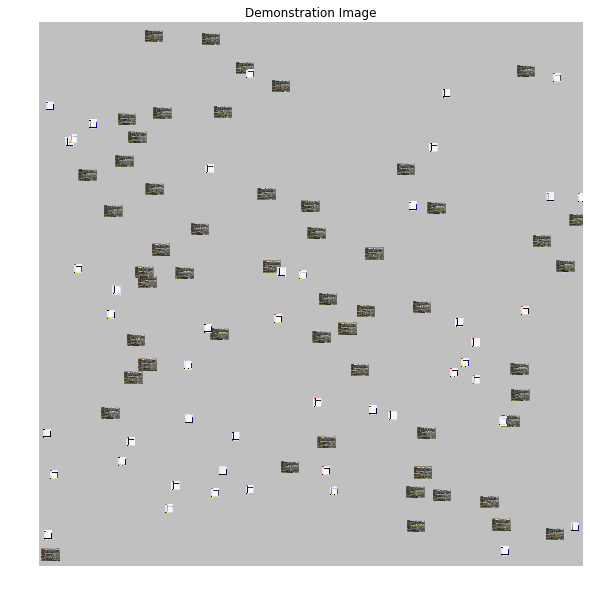

In [20]:
image = plt.imread("figure.jpg")

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(image)
ax.axis('off')  # clear x-axis and y-axis
ax.set_title("Demonstration Image")